In [41]:
import pandas as pd
import numpy as np
import anndata as ad
from random import sample
from math import ceil
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from SpatialDE import spatial_patterns, SpatialPatternParameters

In [42]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/PCA/genetic_effects/PCA20/eqtl_tot_genetic_effect_all.txt"
df = pd.read_csv(filename, sep = "\t", index_col=0)
df.head()

,ENSG00000065675_PRKCQ-10_6668096_G_A,ENSG00000065675_PRKCQ-10_6682022_T_C,ENSG00000082212_ME2-18_48421023_A_G,ENSG00000082212_ME2-18_48445249_A_G,ENSG00000085491_SLC25A24-1_108739849_C_T,ENSG00000085491_SLC25A24-1_108740419_C_T,ENSG00000088448_ANKRD10-13_111536743_T_C,ENSG00000088448_ANKRD10-13_111538047_A_G,ENSG00000088448_ANKRD10-13_111542313_C_T,ENSG00000100058_CRYBB2P1-22_25845855_C_G,...,ENSG00000198563_DDX39B-6_31486901_T_C,ENSG00000198563_DDX39B-6_31501817_T_A,ENSG00000204536_CCHCR1-6_31107087_T_C,ENSG00000204536_CCHCR1-6_31108485_G_A,ENSG00000214087_ARL16-17_79634162_T_G,ENSG00000214087_ARL16-17_79642556_T_C,ENSG00000229150_CRYGEP-2_208977362_C_A,ENSG00000229150_CRYGEP-2_208977797_G_T,ENSG00000254870_ATP6V1G2-DDX39B-6_31486901_T_C,ENSG00000254870_ATP6V1G2-DDX39B-6_31493333_C_T
21843_1#10,0.133579,0.145409,0.120079,0.119443,-0.437915,-0.437915,0.295723,0.29399,0.291428,1.079580,...,-0.764579,-0.764579,-0.445821,-0.464320,-0.7098,-0.545883,0.496494,0.502066,-0.882412,-0.882412
21843_1#100,0.133579,0.054178,0.120079,0.119443,-0.671133,-0.671133,0.295723,0.29399,0.291428,0.781124,...,-0.651527,-0.651527,-0.144214,-0.161815,-0.7098,-0.545883,0.183862,0.163218,-0.815820,-0.815820
21843_1#101,0.133579,0.070005,0.120079,0.119443,-0.565248,-0.565248,0.295723,0.29399,0.291428,1.154654,...,-0.685596,-0.685596,-0.308647,-0.326114,-0.7098,-0.545883,0.382114,0.372532,-0.910065,-0.910065
21843_1#102,0.133579,0.154290,0.120079,0.119443,-0.476046,-0.476046,0.295723,0.29399,0.291428,1.135603,...,-0.738039,-0.738039,-0.491603,-0.516046,-0.7098,-0.545883,0.609889,0.603523,-0.928884,-0.928884
21843_1#103,0.133579,0.105390,0.120079,0.119443,-0.491949,-0.491949,0.295723,0.29399,0.291428,1.111410,...,-0.766852,-0.766852,-0.425245,-0.446257,-0.7098,-0.545883,0.367356,0.387421,-0.958685,-0.958685


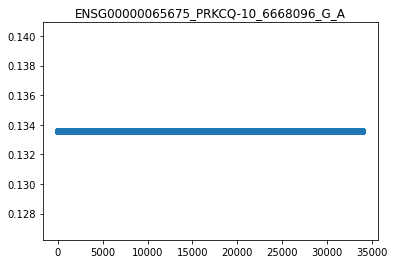

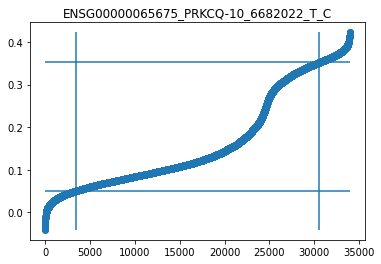

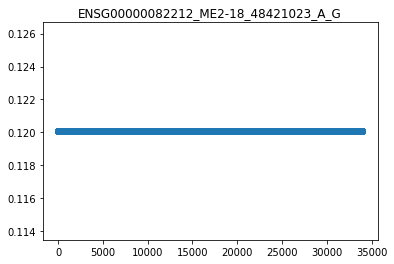

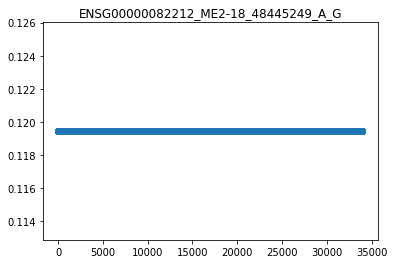

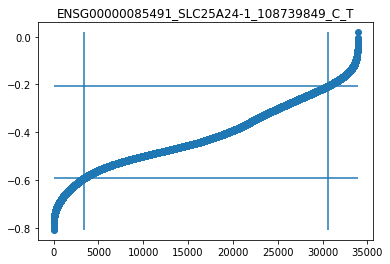

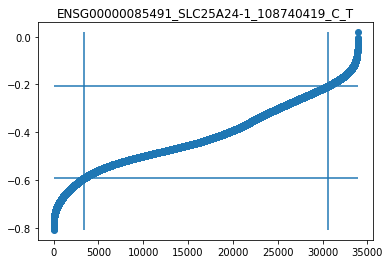

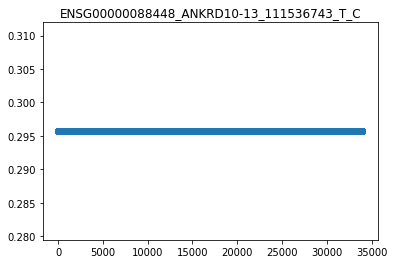

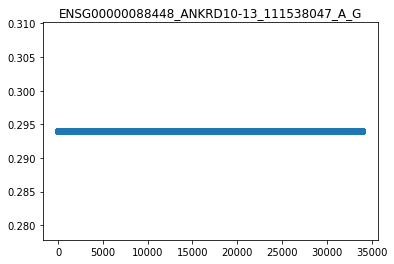

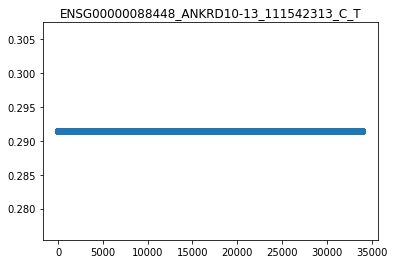

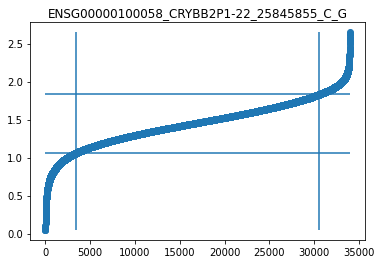

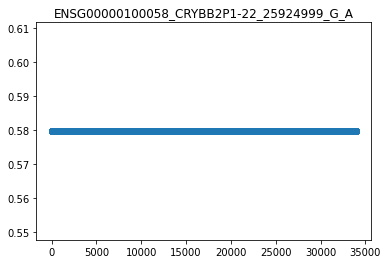

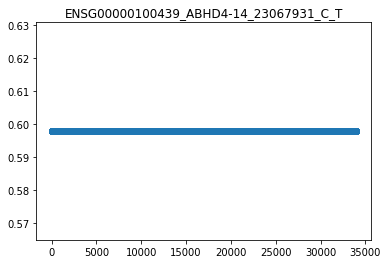

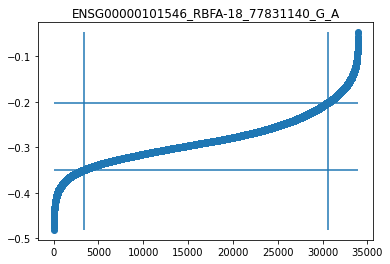

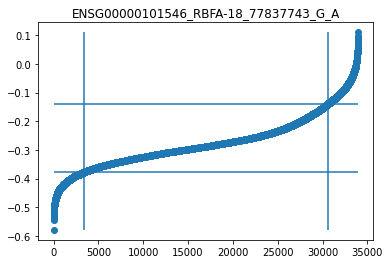

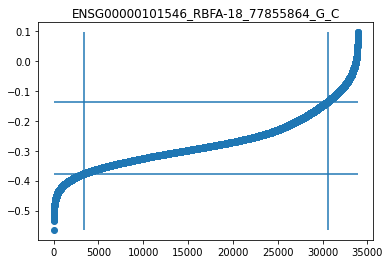

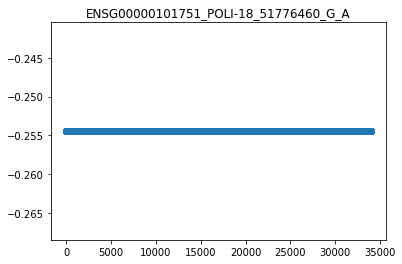

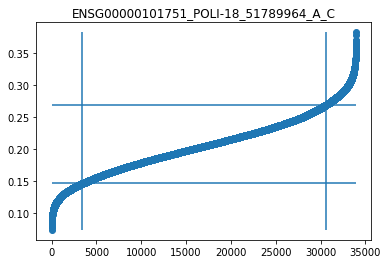

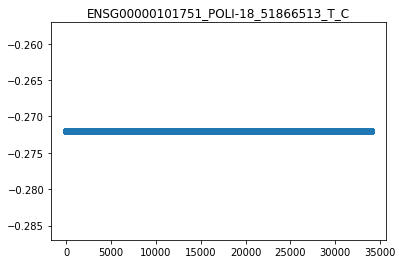

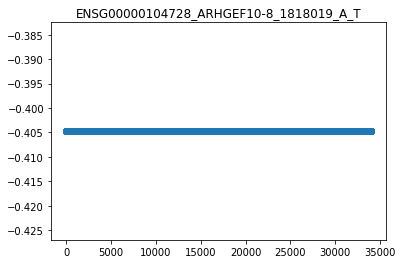

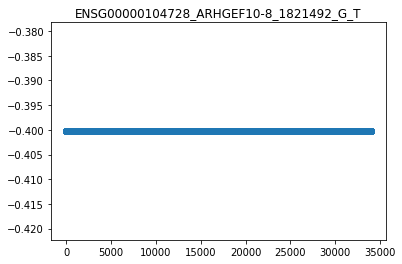

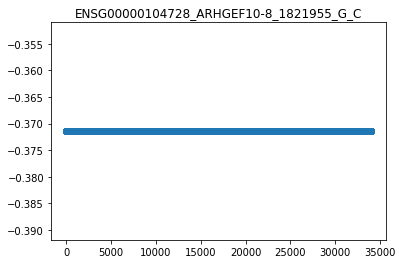

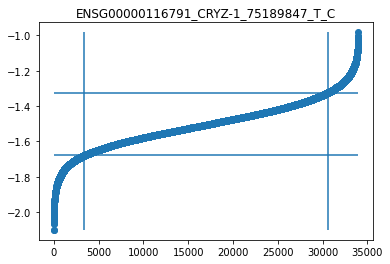

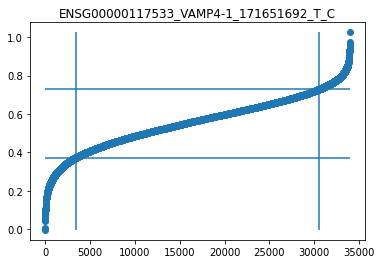

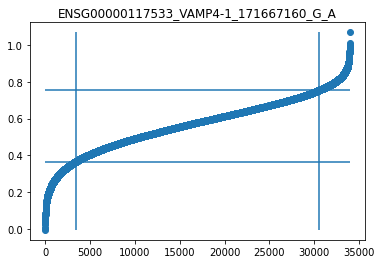

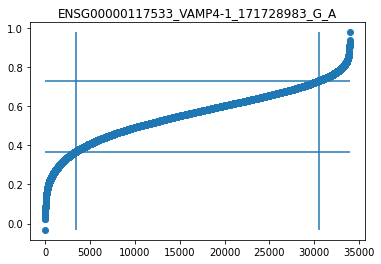

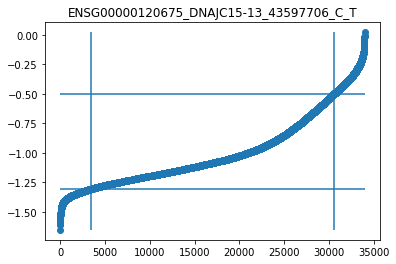

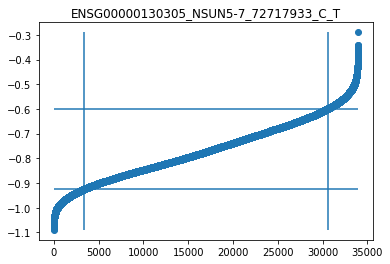

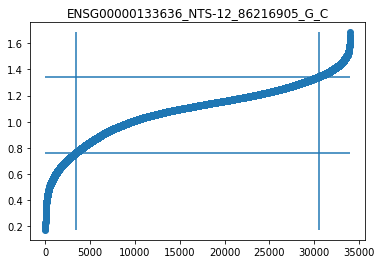

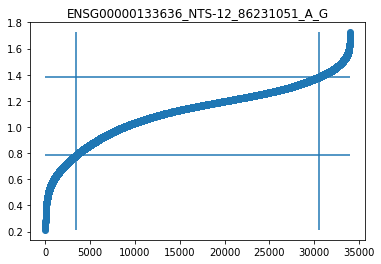

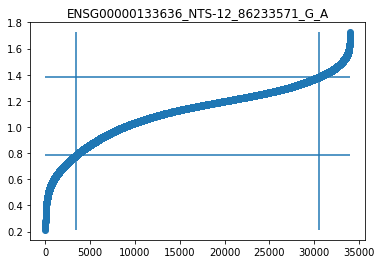

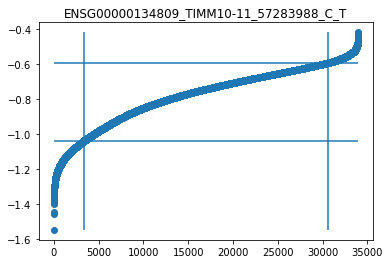

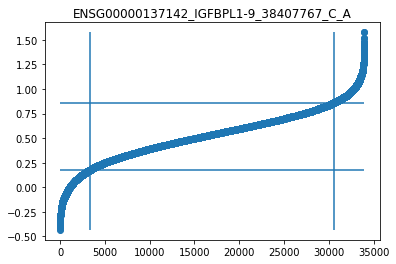

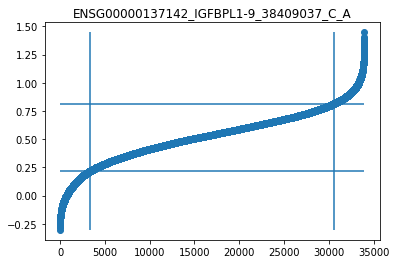

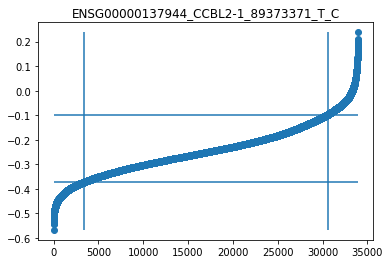

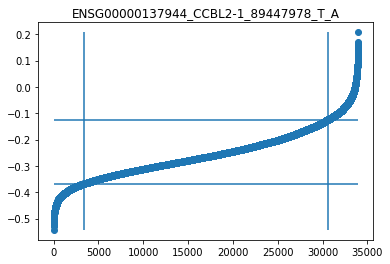

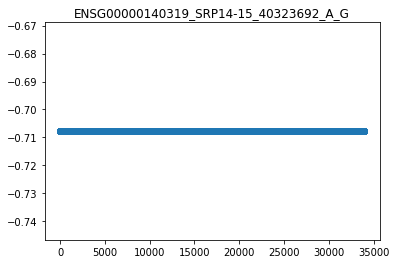

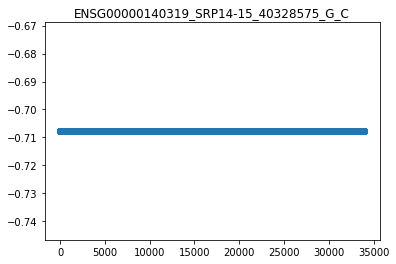

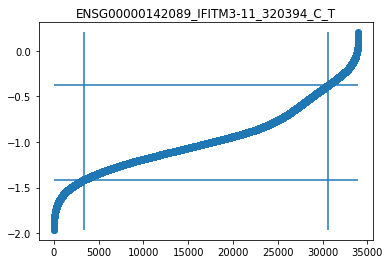

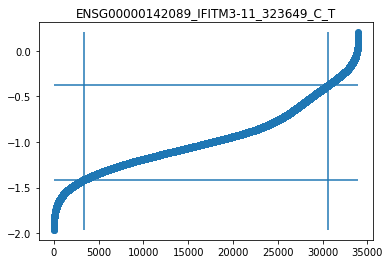

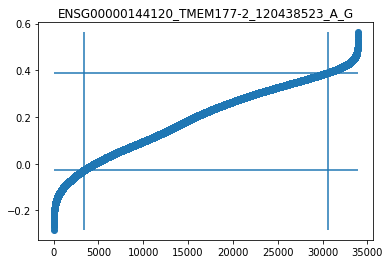

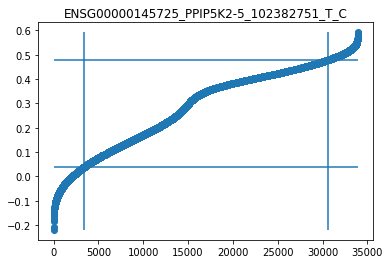

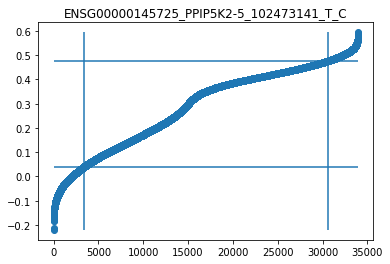

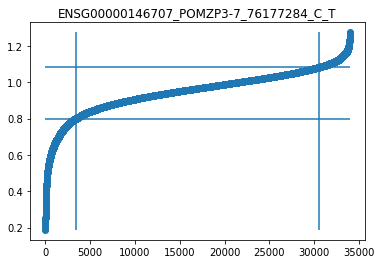

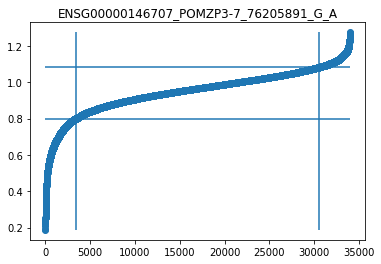

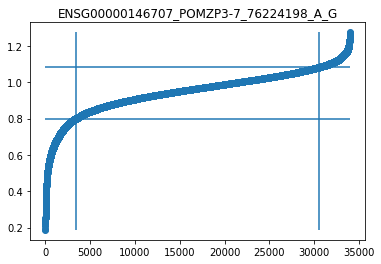

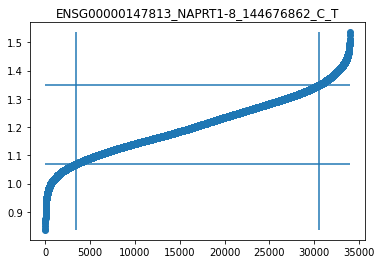

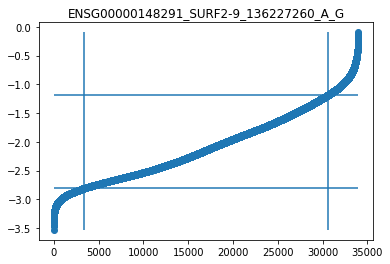

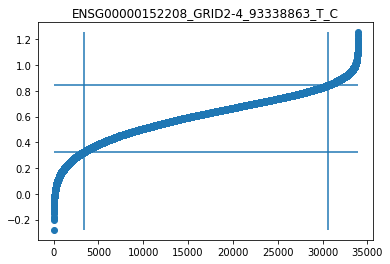

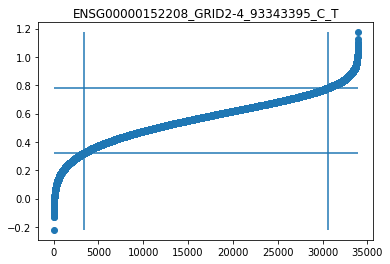

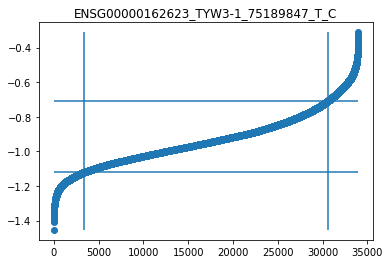

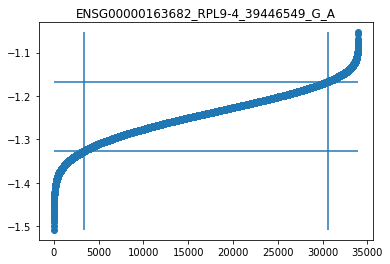

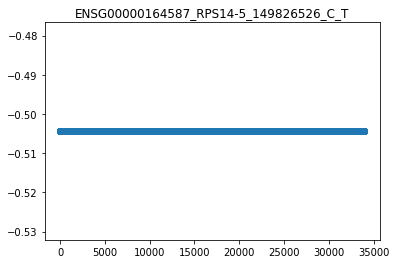

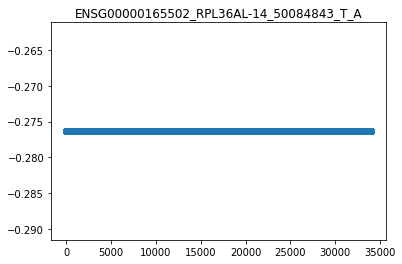

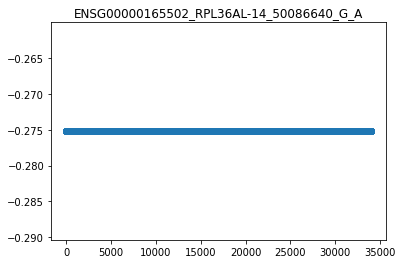

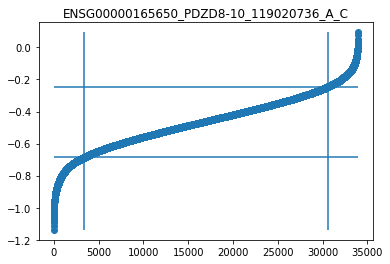

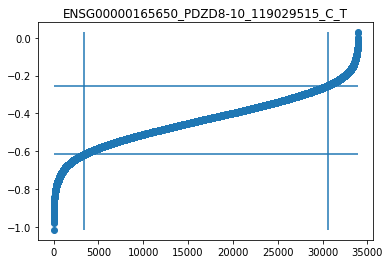

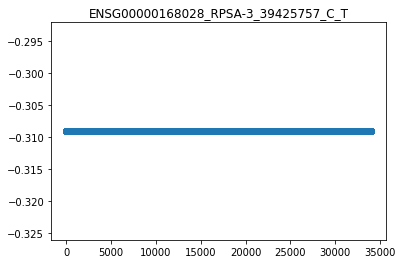

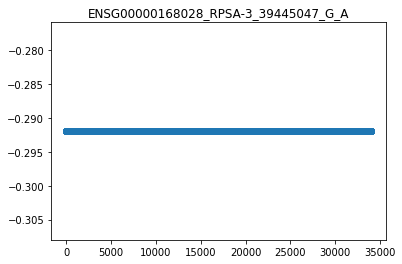

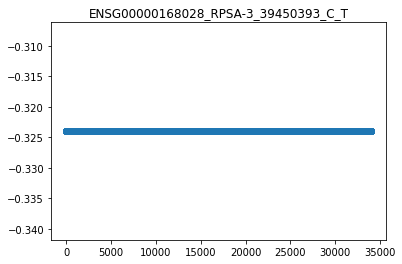

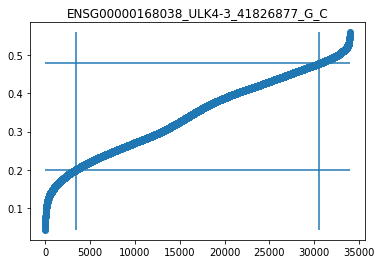

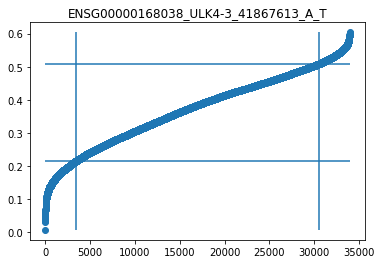

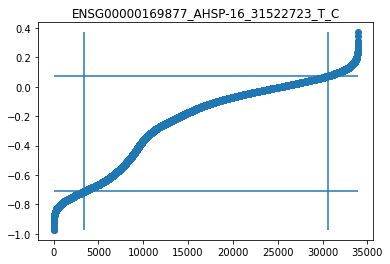

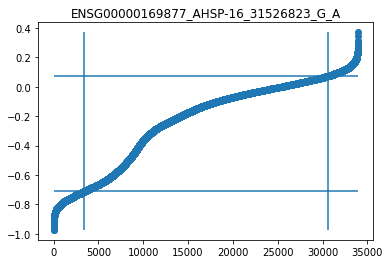

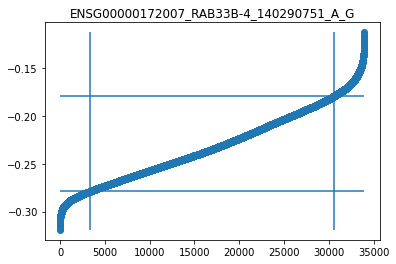

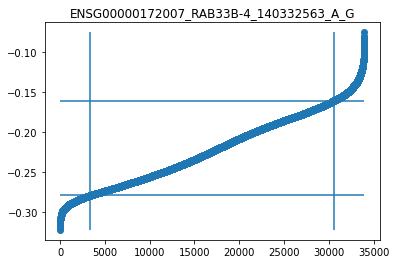

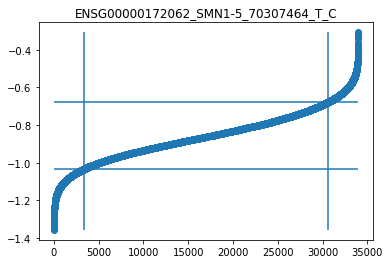

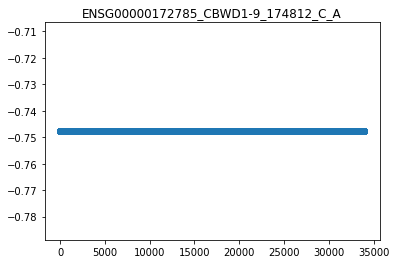

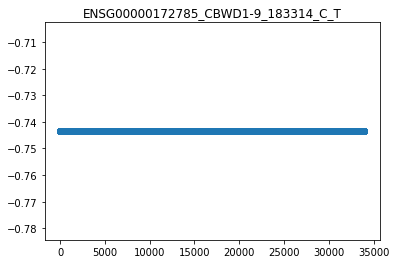

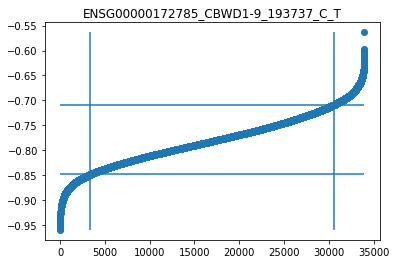

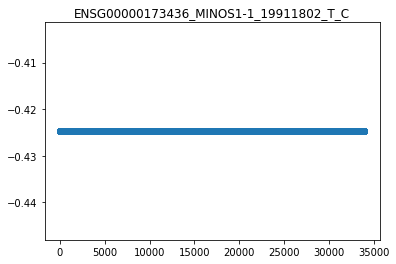

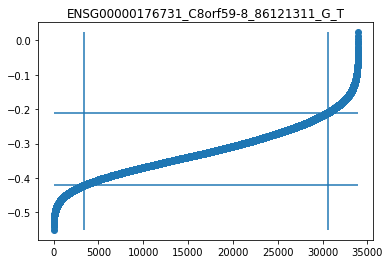

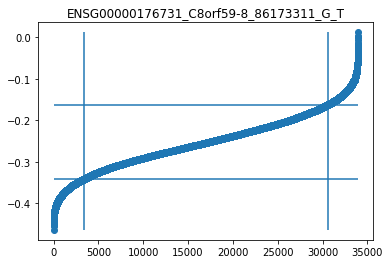

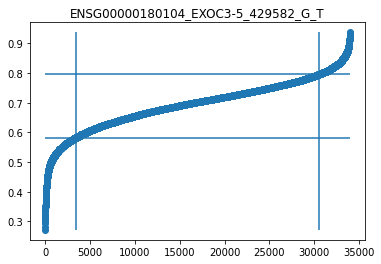

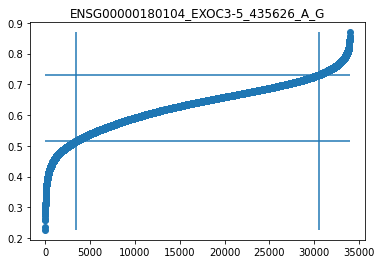

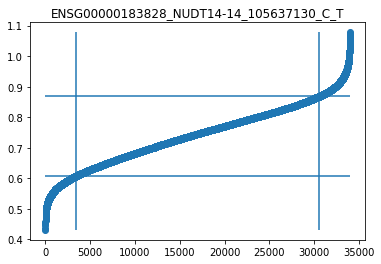

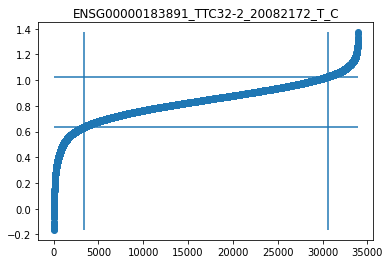

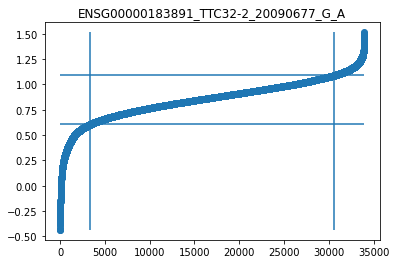

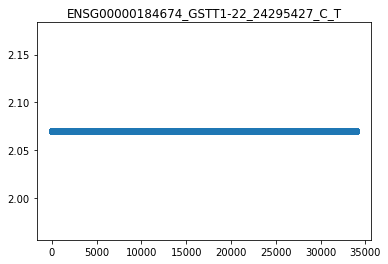

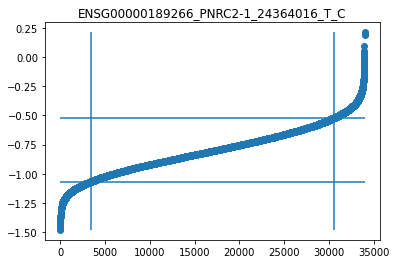

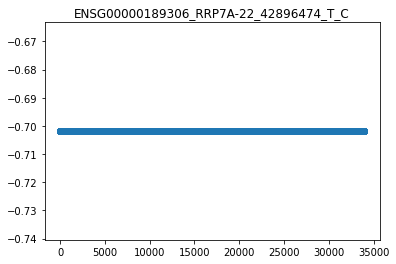

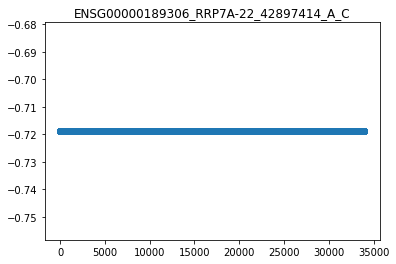

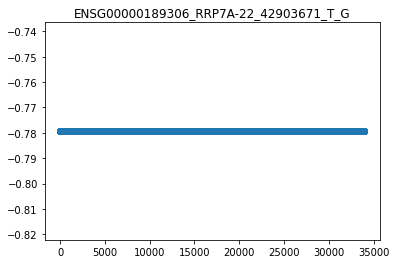

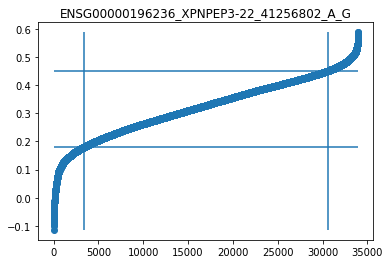

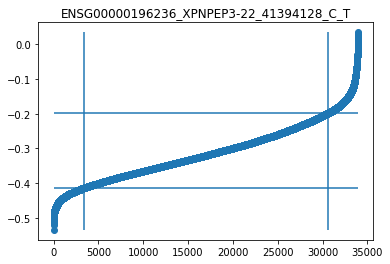

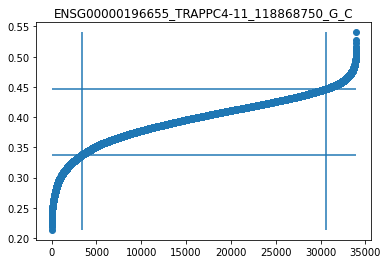

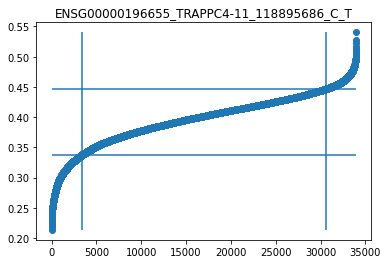

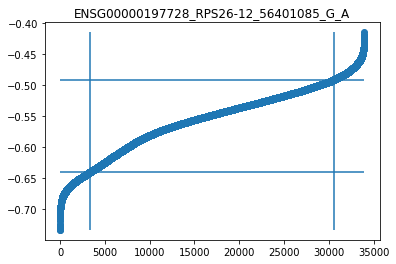

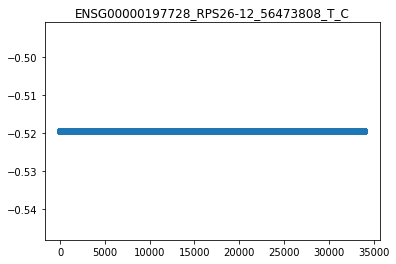

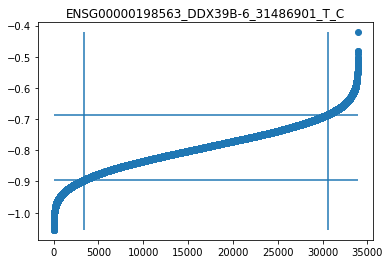

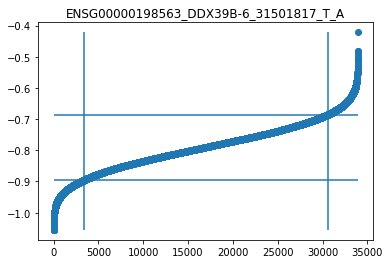

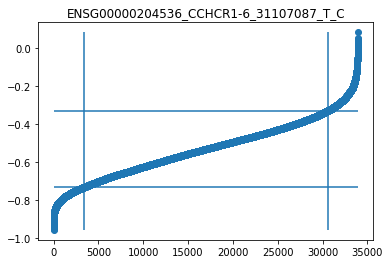

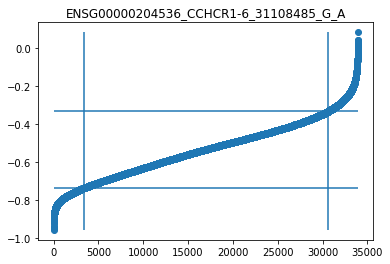

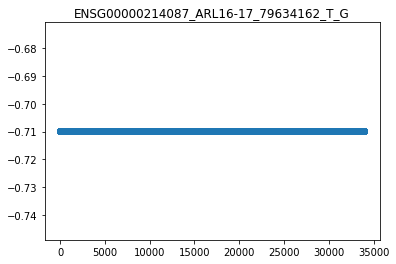

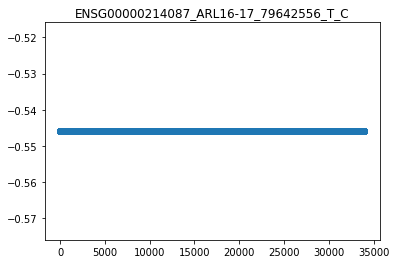

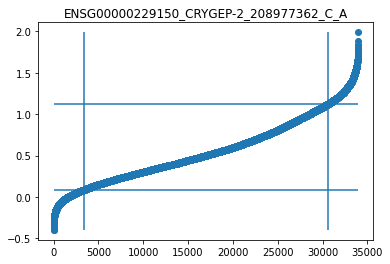

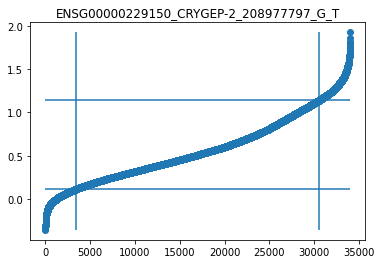

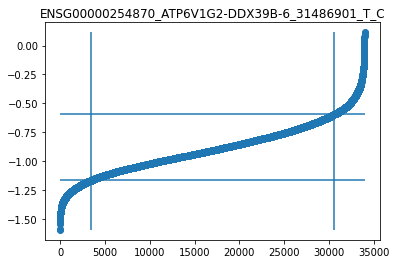

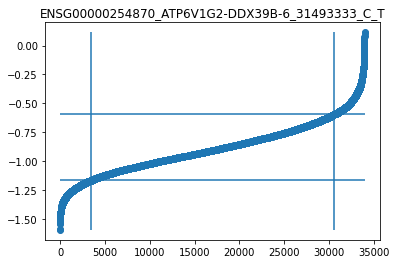

In [43]:
beta = np.array([])
for i in range(df.shape[1]):
# for i in range(5):
    # get single-cell effect sizes
    v = df.values[:,i]
    # get min and max
    ymin = min(v)
    ymax = max(v)
    # rank values
    order = v.argsort()
    y = v[order]
    x = range(len(v))
    plt.scatter(x,y)
    # define 10% of cells
    xx = ceil(0.1*len(v))
    plt.vlines(x=xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[xx],xmin=0, xmax=len(v))
    plt.vlines(x=len(v)-xx,ymin=ymin, ymax=ymax)
    plt.hlines(y=y[len(v)-xx],xmin=0, xmax=len(v))
    # add title
    plt.title(df.columns.values[i])
    plt.show()
    beta = np.append(beta,y[len(v)-xx]-y[xx])

In [44]:
beta.shape
df.columns.values.shape

(98,)

In [45]:
d = np.concatenate([beta.reshape(beta.shape[0],1),df.columns.values.reshape(beta.shape[0],1)], axis=1)
df_beta = pd.DataFrame(data = d, columns = ["beta","eqtl"])
df_beta.head()

,beta,eqtl
0,0.0,ENSG00000065675_PRKCQ-10_6668096_G_A
1,0.301803,ENSG00000065675_PRKCQ-10_6682022_T_C
2,0.0,ENSG00000082212_ME2-18_48421023_A_G
3,0.0,ENSG00000082212_ME2-18_48445249_A_G
4,0.385339,ENSG00000085491_SLC25A24-1_108739849_C_T


In [46]:
df_beta.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/PCA/genetic_effects/PCA10_old/eqtl_est_single_genetic_effects.csv")

In [47]:
max(beta)

1.6188130482723702

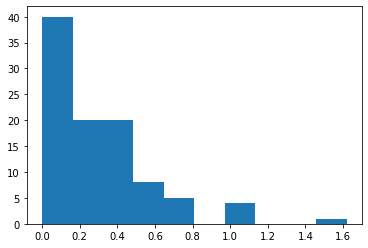

In [48]:
plt.hist(beta)
plt.show()

In [49]:
len(beta[beta>0])

67

In [50]:
len(beta[beta>0.2])

57

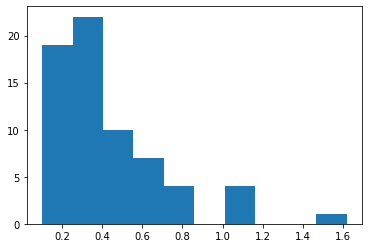

In [51]:
plt.hist(beta[beta>0])
plt.show()

In [52]:
beta[beta.argsort()]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.09949453, 0.10875274, 0.10875274, 0.11828567,
       0.12264076, 0.13962058, 0.14729817, 0.14813354, 0.15924363,
       0.17803471, 0.20899659, 0.20899659, 0.21043998, 0.21383304,
       0.21442531, 0.21639468, 0.23731367, 0.24076965, 0.24259583,
       0.26176536, 0.27034529, 0.27459473, 0.27744594, 0.28114312,
       0.28363254, 0.28363254, 0.28363254, 0.29424257, 0.30180295,
       0.32566305, 0.35387139, 0.35466528, 0.35581834, 0.36232376,
       0.36378077, 0.38533911, 0.38533911, 0.38904136, 0.39271829,
       0.40215768, 0.40234134, 0.41014142, 0.41703653, 0.43557

In [53]:
df_beta[df_beta["beta"]>0.3]

,beta,eqtl
1,0.301803,ENSG00000065675_PRKCQ-10_6682022_T_C
4,0.385339,ENSG00000085491_SLC25A24-1_108739849_C_T
5,0.385339,ENSG00000085491_SLC25A24-1_108740419_C_T
9,0.774163,ENSG00000100058_CRYBB2P1-22_25845855_C_G
21,0.353871,ENSG00000116791_CRYZ-1_75189847_T_C
22,0.355818,ENSG00000117533_VAMP4-1_171651692_T_C
23,0.389041,ENSG00000117533_VAMP4-1_171667160_G_A
24,0.362324,ENSG00000117533_VAMP4-1_171728983_G_A
25,0.809393,ENSG00000120675_DNAJC15-13_43597706_C_T
26,0.325663,ENSG00000130305_NSUN5-7_72717933_C_T


In [54]:
df_betas_sel = df_beta[df_beta["beta"]>0.1]
df_betas_sel.head()

,beta,eqtl
1,0.301803,ENSG00000065675_PRKCQ-10_6682022_T_C
4,0.385339,ENSG00000085491_SLC25A24-1_108739849_C_T
5,0.385339,ENSG00000085491_SLC25A24-1_108740419_C_T
9,0.774163,ENSG00000100058_CRYBB2P1-22_25845855_C_G
12,0.147298,ENSG00000101546_RBFA-18_77831140_G_A


In [55]:
eqtls = np.array(df_betas_sel["eqtl"])
# eqtls

In [56]:
df = df.loc[:,eqtls]
df.shape

(33964, 66)

In [57]:
### PC coordinates
pcs_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/20PCs.csv"
df_pcs = pd.read_csv(pcs_filename, index_col=0)
df_pcs.head()
# df_pcs.index

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
21843_1#10,-12.241231,-12.615219,0.547209,-11.411204,-7.052088,-2.753602,-2.819420,-0.997514,-2.134267,-4.434583,3.724611,2.154235,-1.938668,4.971339,3.666697,-3.698830,-0.168870,-4.136780,-3.313431,-3.032797
21843_1#100,4.509125,-27.066293,7.556447,-9.366868,-1.471991,-1.233592,5.483314,0.827803,-9.562815,-1.871798,-0.091995,-0.840175,9.965509,-5.220129,-1.133895,-1.542435,-2.219212,8.085067,5.265094,-1.568351
21843_1#101,-1.273414,-23.323484,-0.501903,-3.819575,-1.463243,-1.292333,0.925825,-0.646956,-2.177145,3.929749,-0.678166,0.184894,9.706456,-5.136420,1.524443,-0.099486,0.343539,6.674060,-1.656961,3.955077
21843_1#102,-14.962566,-12.966367,1.967406,-5.446326,-13.316007,-4.004730,-3.824988,0.839491,-0.218414,1.846062,3.933730,-1.173618,0.268460,0.942596,2.465615,-6.335532,-0.081144,-1.212628,-1.344296,-2.985996
21843_1#103,-6.341665,-19.010467,-2.824975,-2.462769,-7.521426,0.737802,-3.359170,1.785118,0.364917,-2.724446,3.175627,-5.397832,5.202921,2.945597,1.326522,-2.319161,-2.120162,1.491804,-2.526366,-3.251526


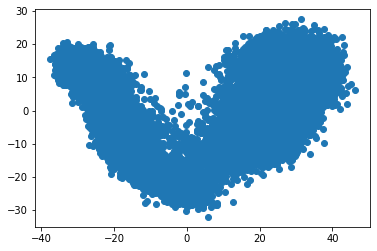

In [58]:
plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1])
plt.show()

In [59]:
## consider only shared cells

In [60]:
all_cells = df_pcs.index.values

In [61]:
## sample 20% of cells

In [62]:
cells = sample(list(all_cells), k = ceil(len(all_cells)*0.2))
cells = sorted(set(list(df.index.values)).intersection(cells))

In [63]:
df = df[df.index.isin(cells)]
df.shape

(6791, 66)

In [64]:
df_pcs = df_pcs[df_pcs.index.isin(cells)]
df_pcs.shape

(6791, 20)

In [65]:
# sort to ensure cells are in the same order
df = df.sort_index(axis=0)
df_pcs = df_pcs.sort_index(axis=0)

In [66]:
# scale values
mat = minmax_scale(df)
df = pd.DataFrame(data = mat, index = df.index, columns = df.columns)

In [67]:
# delect columns that are only 0s
df = df.loc[:, (df != 0).any(axis=0)]

In [68]:
### build "fake" AnnData file
#
# counts: single-cell eQTL effects
# adata.obsm['spatial']: coordinates (PCA, UMAP..)

In [69]:
# obs i.e. cells
obs_names = df.index.values
obs = pd.DataFrame(index=obs_names)
# obs
n_obs = len(obs)
n_obs

6791

In [70]:
# vars i.e. genes (or in this case gene-SNP pairs)
var_names = df.columns.values
var = pd.DataFrame(index=var_names)
# var
n_vars = len(var)
n_vars

66

In [71]:
X = df.to_numpy()
X.shape
type(X)

numpy.ndarray

In [72]:
adata = ad.AnnData(X=X, obs=obs, var=var, dtype='float')
adata

AnnData object with n_obs × n_vars = 6791 × 66

In [73]:
## add PCs as "spatial" coordinates
adata.obsm['spatial'] = df_pcs
adata.obsm['spatial'].shape

(6791, 20)

In [74]:
adata

AnnData object with n_obs × n_vars = 6791 × 66
    obsm: 'spatial'

In [75]:
sp = spatial_patterns(adata, normalized = True, params=SpatialPatternParameters(lengthscales=5))

In [76]:
d = np.concatenate([sp[0].labels.reshape(len(sp[0].labels),1),
                    adata.var.index.to_numpy().reshape(len(sp[0].labels),1)], axis=1)
df_labels = pd.DataFrame(data = d, columns = ["label","gene"])
df_labels.head()

,label,gene
0,6,ENSG00000065675_PRKCQ-10_6682022_T_C
1,4,ENSG00000085491_SLC25A24-1_108739849_C_T
2,4,ENSG00000085491_SLC25A24-1_108740419_C_T
3,6,ENSG00000100058_CRYBB2P1-22_25845855_C_G
4,5,ENSG00000101546_RBFA-18_77831140_G_A


In [77]:
df_pp = pd.DataFrame(data = sp[0].pattern_probabilities, columns = ["pp"+str(i) for i in np.arange(len(np.unique(sp[0].labels)))])
df_pp.head()

,pp0,pp1,pp2,pp3,pp4,pp5,pp6
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
df_clusters = pd.concat([df_labels, df_pp], axis = 1)
df_clusters.head()

,label,gene,pp0,pp1,pp2,pp3,pp4,pp5,pp6
0,6,ENSG00000065675_PRKCQ-10_6682022_T_C,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,ENSG00000085491_SLC25A24-1_108739849_C_T,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,ENSG00000085491_SLC25A24-1_108740419_C_T,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6,ENSG00000100058_CRYBB2P1-22_25845855_C_G,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,ENSG00000101546_RBFA-18_77831140_G_A,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
df_clusters[df_clusters["gene"]=="ENSG00000137331_IER3-6_30639412_A_G"]

,label,gene,pp0,pp1,pp2,pp3,pp4,pp5,pp6


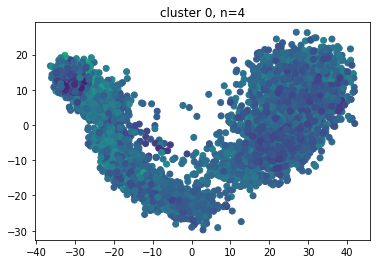

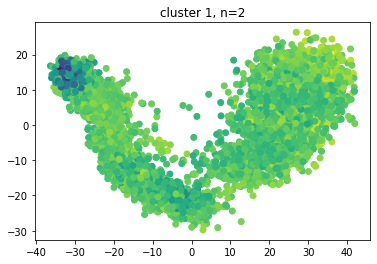

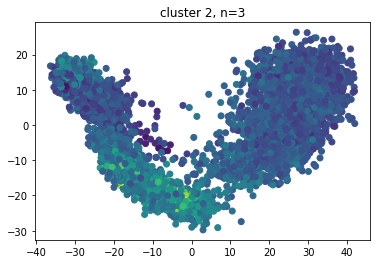

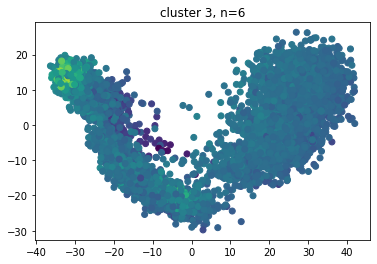

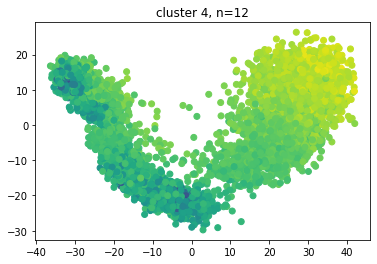

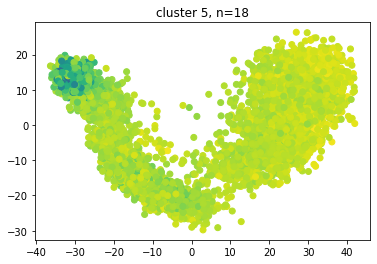

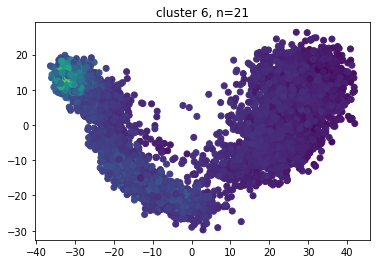

In [80]:
for i in np.arange(sp[0].patterns.shape[1]):
    plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1], c = sp[0].patterns[:,i])
    plt.title("cluster "+str(i)+", n="+str(df_clusters[df_clusters["label"] == i].shape[0]))
    plt.show()